# ２次元 Data の整理

In [17]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import japanize_matplotlib

%precision 3
pd.options.display.precision = 3

In [18]:
df = pd.read_csv('../data/ch2_scores_em.csv', index_col='生徒番号')

In [19]:
en_scores = np.array(df['英語'])[:10]
ma_scores = np.array(df['数学'])[:10]

scores_df = pd.DataFrame({'英語': en_scores,
                          '数学': ma_scores, },
                         index=pd.Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], name='生徒'))

scores_df

,英語,数学
生徒,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


## ２つの Data の関係性の指標
#### 正の相関
１つの Data の値が高いほど、もう１つの Data の値も高い傾向にあること
#### 負の相関
１つの Data の値が高いほど、もう１つの Data の値が低い傾向にあること
#### 無相関
それぞれの Data が正の相関にも負の相関にも当てはまらず、それぞれの値が直接的な影響を及ばさないとき

### 共分散（covariance）
相関の関係性を数値化するための指標。
- 共分散が正であれば正の相関
- 共分散が負であれば負の相関
- 共分散が０に近ければ無相関

を表す

In [20]:
summary_df = scores_df.copy()
summary_df['英語の偏差'] = summary_df['英語'] - summary_df['英語'].mean()
summary_df['数学の偏差'] = summary_df['数学'] - summary_df['数学'].mean()
summary_df['偏差同士の積'] = summary_df['英語の偏差'] * summary_df['数学の偏差']
summary_df

,英語,数学,英語の偏差,数学の偏差,偏差同士の積
生徒,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [21]:
summary_df['偏差同士の積'].mean()

62.800

英語の点数と数学の点数は正の相関をもっているといえそう。

NumPy で共分散を求める場合は、`cov` 関数を利用する

In [22]:
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
display(cov_mat)

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

- １行目１列目が第１引数の英語
- ２行目２列目が第２引数の数学

にそれぞれ対応。それらが交わる１行２列目の要素、２行目１列目の要素が英語と数学の共分散に該当。

In [23]:
cov_mat[0, 1], cov_mat[1, 0]

(62.800, 62.800)

残りの要素
- １行目の１列目は英語と英語の共分散、つまり英語の分散
- ２行目の２列目は数学と数学の共分散、つまり数学の分散

になる。

In [24]:
cov_mat[0, 0], cov_mat[1, 1]

(86.000, 68.440)

In [25]:
np.var(en_scores, ddof=0), np.var(ma_scores, ddof=0)

(86.000, 68.440)

`np.cov` 関数の同変数同士の共分散と `np.var` 関数でもとめた対象変数の分散の値が同一なことを確認。
※ DataFrame の `cov` method は、`ddof` 引数をとらず不偏分散しか計算できないため、今回割愛。

### 相関係数（correlation coefficient)

- 共分散を各 Data の標準偏差で割ることによって定義した指標
- 必ず -1 から 1 の間をとる
  - Data が正の相関をもつほど１に近づく
  - Data が負の相関をもつほど-1に近づく
  - 無相関であれば０になる。
- 共分散は単位の性質として直観的理解を困難にする。
- 共分散は各 Data の単位をかけたものになる為、各 Data の標準偏差で割ることで単位に依存しなくなる

In [26]:
# 数式とおりに相関係数を算出する
np.cov(en_scores, ma_scores, ddof=0)[0, 1] / (np.std(en_scores) * np.std(ma_scores))

0.819

相関係数が0.819という１に近い数値なった。明確な基準はないが各 Data に強い相関があるといえそうである。

In [27]:
# NumPy を利用して相関係数を求める
display(np.corrcoef(en_scores, ma_scores))

array([[1.   , 0.819],
       [0.819, 1.   ]])

相関行列の\[0, 1]の要素と\[1, 0]の要素が英語と数学の相関係数に対応。
※\[0, 0], \[1, 1]は英語と英語、数学と数学の相関係数になるので１になる

In [28]:
# DataFrame を利用して相関係数を求める
scores_df.corr()

,英語,数学
英語,1.000,0.819
数学,0.819,1.000


## ２次元 Data の視覚化
- 散布図: ２次元の Data を図示するときにとても便利
- 回帰直線: Data の関係を表現する直線
- ヒートマップ(Heatmap): Histogram の２次元版

### 散布図

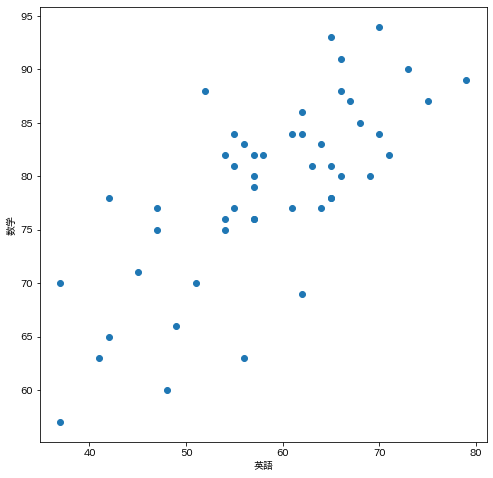

In [29]:
english_scores = np.array(df['英語'])
math_scores = np.array(df['数学'])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
# 散布図
ax.scatter(english_scores, math_scores)
ax.set_xlabel('英語')
ax.set_ylabel('数学')

plt.show()

散布図から英語の点数が高いほど、数学の点数も高い、という傾向がありそうに見える

### 回帰直線(regression line)
２つの Data 間の関係性をもっともよく表現する直線。

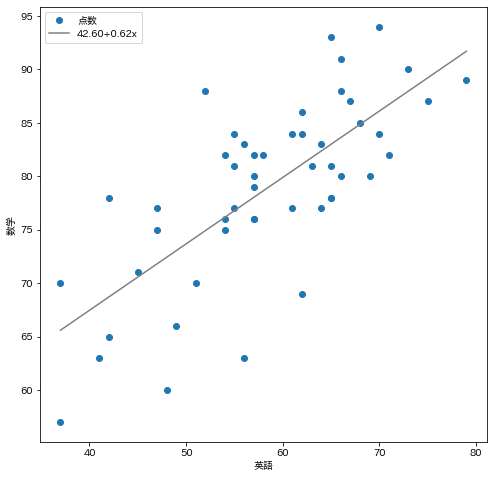

In [30]:
# 係数β_0 と β_1 を求める
poly_fit = np.polyfit(english_scores, math_scores, 1)
# β_0+β_1 x を返す関数を作る
poly_1d = np.poly1d(poly_fit)
# 直線を描画するための x 座標を作る
xs = np.linspace(english_scores.min(), english_scores.max())
# xs に対応する y 座標を求める
ys = poly_1d(xs)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('英語')
ax.set_ylabel('数学')
ax.scatter(english_scores, math_scores, label='点数')
ax.plot(xs, ys, color='gray', label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
# 凡例の表示
ax.legend(loc='upper left')

plt.show()

### ヒートマップ(heat map)
Histogram の２次元版を色によって表すことができる Graph

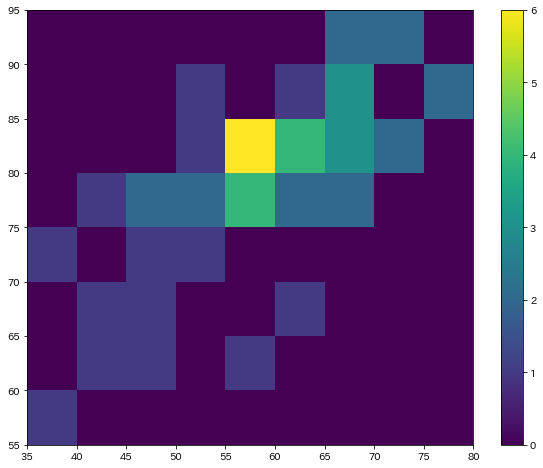

In [31]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores, bins=[9, 8], range=[(35, 80), (55, 95)])
ax.set_xticks(c[1])
ax.set_yticks(c[2])
# Color bar の表示
fig.colorbar(c[3], ax=ax)
plt.show()

## アンスコムの例
- 平均や分散、相関係数といった数値の指標に Data をまとめることで Data がもつ様々な特徴を確認できるようになるが、多くの情報が失われている。
- 同じような指標をもった Data でも図示してみると全く異なる Data ということも珍しくない。

同じ指標を持っているが全く異なる Data という例を、アンスコムの例と呼ばれる Data を使ってみていく

In [35]:
# npy 形式で保存された NumPy array を読み込む
anscombe_data = np.load('../data/ch3_anscombe.npy')
print(anscombe_data.shape)
display(anscombe_data[0])

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

各 Data の平均・分散・相関係数・回帰直線を計算して DataFrame にまとめる

In [38]:
stat_df = pd.DataFrame(index=['Ｘの平均', 'Ｘの分散', 'Ｙの平均', 'Ｙの分散', 'ＸとＹの相関係数', 'ＸとＹの回帰直線'])
for i, data in enumerate(anscombe_data):
    dataX = data[:, 0]
    dataY = data[:, 1]
    poly_fit = np.polyfit(dataX, dataY, 1)
    stat_df[f'data{i + 1}'] = [f'{np.mean(dataX):.2f}',
                               f'{np.var(dataX):.2f}',
                               f'{np.mean(dataY):.2f}',
                               f'{np.var(dataY):.2f}',
                               f'{np.corrcoef(dataX, dataY)[0, 1]:.2f}',
                               f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']

stat_df

,data1,data2,data3,data4
Ｘの平均,9.00,9.00,9.00,9.00
Ｘの分散,10.00,10.00,10.00,10.00
Ｙの平均,7.50,7.50,7.50,7.50
Ｙの分散,3.75,3.75,3.75,3.75
ＸとＹの相関係数,0.82,0.82,0.82,0.82
ＸとＹの回帰直線,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


どの Data も平均から回帰直線まですべてが一致している。指標の上では４つの Data はすべて同じになる。
確認の為に散布図を描画してみる。

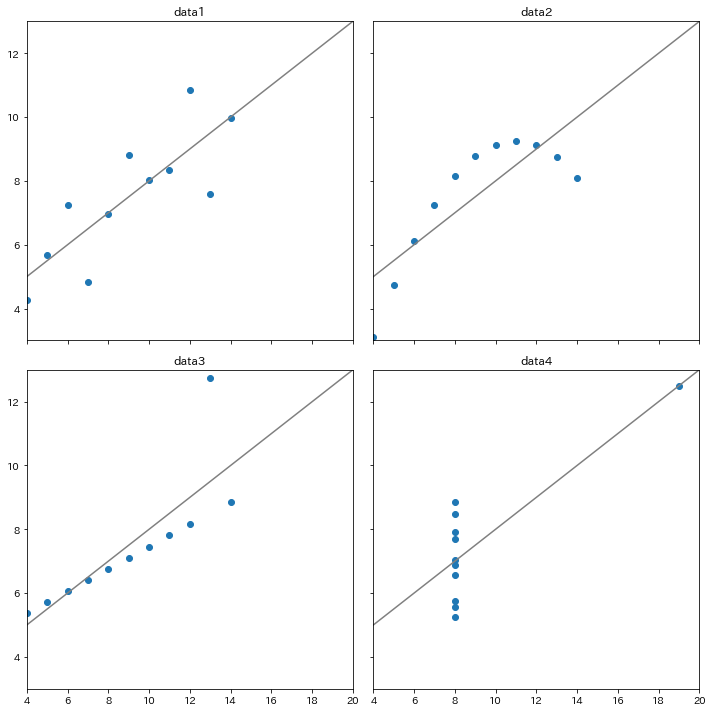

In [39]:
# Graph を描画する領域を２Ｘ２個作る
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharex=True, sharey=True)

xs = np.linspace(0, 30, 100)
for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:, 0], data[:, 1], 1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    # 描画する領域の選択
    ax = axes[i // 2, i % 2]
    ax.set_xlim([4, 20])
    ax.set_ylim([3, 13])
    # Title をつける
    ax.set_title(f'data{i + 1}')
    ax.scatter(data[:, 0], data[:, 1])
    ax.plot(xs, ys, color='gray')

# Graph 同士の間隔を狭くする
plt.tight_layout()
plt.show()

各 Data は全く異なった分布をしている。
- 平均や分散といった指標は多くのことを教えてくれるが、過信してはいけない。
- Data を分析するときは、できるだけ図示も行なうべき